# Scikit-garden_test2

分類用のサンプルデータであるBreast Cancerを読み込みます。

In [3]:
# Load and return the breast cancer wisconsin dataset (classification).
# The breast cancer dataset is a classic and very easy binary classification dataset.
import pandas as pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

# Set dataframe
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.DataFrame(dataset.target, columns=['y'])

# check the shape
print('----------------------------------------------------------------------------------------')
print('X shape: (%i,%i)' %X.shape)
print('y shape: (%i,%i)' %y.shape)
print('----------------------------------------------------------------------------------------')
print(y.groupby('y').size())
print('y=0 means Marignant(悪性), y=1 means Benign(良性):')
print('----------------------------------------------------------------------------------------')
X.join(y).head()

----------------------------------------------------------------------------------------
X shape: (569,30)
y shape: (569,1)
----------------------------------------------------------------------------------------
y
0    212
1    357
dtype: int64
y=0 means Marignant(悪性), y=1 means Benign(良性):
----------------------------------------------------------------------------------------


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


とりあえず、精度が出るか確認

In [4]:
# import basice apis
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from skgarden.mondrian.ensemble import MondrianForestClassifier

# import Sample Data to learn models
dataset = load_breast_cancer()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.DataFrame(dataset.target, columns=['y'])

# split data for crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


scaler = StandardScaler()
scaler.fit(X_train)
X_train_scl = scaler.transform(X_train)
X_test_scl = scaler.transform(X_test)
# set pipelines for different algorithms
rf = RandomForestClassifier(random_state=1)
gb = GradientBoostingClassifier(random_state=1)
mf = MondrianForestClassifier()


# fit & evaluation
rf.fit(X_train_scl,y_train.as_matrix().ravel()) 
gb.fit(X_train_scl,y_train.as_matrix().ravel()) 
mf.fit(X_train_scl,y_train.as_matrix().ravel())


print('RandomForest:%.3f' %accuracy_score(y_test.as_matrix().ravel(), rf.predict(X_test_scl)))
print('GradientBoosting:%.3f' %accuracy_score(y_test.as_matrix().ravel(), gb.predict(X_test_scl)))
print('MondrianForest:%.3f' %accuracy_score(y_test.as_matrix().ravel(), mf.predict(X_test_scl)))
X_test_scl.shape
y_test.shape

RandomForest:0.947
GradientBoosting:0.965
MondrianForest:0.947


(114, 1)

とりあえず、この分類では精度はよし。
リアルな使い方を軽く想定して、
最初に割と大きなの、次に8個くらいに分けて順次読み込みをしてみる。

In [5]:
#データセットを8個に分ける

X1 = X_train.iloc[:100,:]
y1 = y_train.iloc[:100,:]
X2 = X_train.iloc[100:150,:]
y2 = y_train.iloc[100:150,:]
X3 = X_train.iloc[150:200,:]
y3 = y_train.iloc[150:200,:]
X4 = X_train.iloc[200:250,:]
y4 = y_train.iloc[200:250,:]
X5 = X_train.iloc[250:300,:]
y5 = y_train.iloc[250:300,:]
X6 = X_train.iloc[300:350,:]
y6 = y_train.iloc[300:350,:]
X7 = X_train.iloc[350:400,:]
y7 = y_train.iloc[350:400,:]
X8 = X_train.iloc[400:,:]
y8 = y_train.iloc[400:,:]

print('X1 shape: (%i,%i)' %X1.shape)
print('y1 shape: (%i,%i)' %y1.shape)
print('----------------------------------------------------------------------------------------')
print('X3 shape: (%i,%i)' %X3.shape)
print('y3 shape: (%i,%i)' %y3.shape)
print('----------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------')
print('X5 shape: (%i,%i)' %X5.shape)
print('y5 shape: (%i,%i)' %y5.shape)
print('----------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------')
print('X7 shape: (%i,%i)' %X7.shape)
print('y7 shape: (%i,%i)' %y7.shape)

print('----------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------')
print('X8 shape: (%i,%i)' %X8.shape)
print('y8 shape: (%i,%i)' %y8.shape)

print('----------------------------------------------------------------------------------------')


X1 shape: (100,30)
y1 shape: (100,1)
----------------------------------------------------------------------------------------
X3 shape: (50,30)
y3 shape: (50,1)
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
X5 shape: (50,30)
y5 shape: (50,1)
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
X7 shape: (50,30)
y7 shape: (50,1)
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
X8 shape: (55,30)
y8 shape: (55,1)
----------------------------------------------------------------------------------------


In [6]:
from skgarden.mondrian.ensemble import MondrianForestClassifier
from sklearn.preprocessing import StandardScaler

# build the model
#変換スケールが先ほどと変わってしまうが、最初のデータX1で標準化する。
scaler2 = StandardScaler()
scaler2.fit(X1)
X1_scl = scaler2.transform(X1)
X_test_scl2 = scaler2.transform(X_test)
mf2 = MondrianForestClassifier()
mf2.fit(X1_scl,y1.as_matrix().ravel())

ac1 = accuracy_score(y_test.as_matrix().ravel(), mf2.predict(X_test_scl2))
print('accuracy score of the MondrianForest model: %.3f' % ac1)

accuracy score of the MondrianForest model: 0.921


In [7]:
X2_scl = scaler2.transform(X2)
mf2.partial_fit(X2_scl,y2.as_matrix().ravel())

ac2 = accuracy_score(y_test.as_matrix().ravel(), mf2.predict(X_test_scl2))
print('accuracy score of the MondrianForest model: %.3f' % ac2)

accuracy score of the MondrianForest model: 0.886


In [8]:
X3_scl = scaler2.transform(X3)
mf2.partial_fit(X3_scl,y3.as_matrix().ravel())

ac3 = accuracy_score(y_test.as_matrix().ravel(), mf2.predict(X_test_scl2))
print('accuracy score of the MondrianForest model: %.3f' % ac3)

accuracy score of the MondrianForest model: 0.895


In [9]:
X4_scl = scaler2.transform(X4)
mf2.partial_fit(X4_scl,y4.as_matrix().ravel())

ac4 = accuracy_score(y_test.as_matrix().ravel(), mf2.predict(X_test_scl2))
print('accuracy score of the MondrianForest model: %.3f' % ac4)

accuracy score of the MondrianForest model: 0.921


In [10]:
X5_scl = scaler2.transform(X5)
mf2.partial_fit(X5_scl,y5.as_matrix().ravel())

ac5 = accuracy_score(y_test.as_matrix().ravel(), mf2.predict(X_test_scl2))
print('accuracy score of the MondrianForest model: %.3f' % ac5)

accuracy score of the MondrianForest model: 0.930


In [11]:
X6_scl = scaler2.transform(X6)
mf2.partial_fit(X6_scl,y6.as_matrix().ravel())

ac6 = accuracy_score(y_test.as_matrix().ravel(), mf2.predict(X_test_scl2))
print('accuracy score of the MondrianForest model: %.3f' % ac6)

accuracy score of the MondrianForest model: 0.930


In [12]:
X7_scl = scaler2.transform(X7)
mf2.partial_fit(X7_scl,y7.as_matrix().ravel())

ac7 = accuracy_score(y_test.as_matrix().ravel(), mf2.predict(X_test_scl2))
print('accuracy score of the MondrianForest model: %.3f' % ac7)

accuracy score of the MondrianForest model: 0.939


In [13]:
X8_scl = scaler2.transform(X8)
mf2.partial_fit(X8_scl,y8.as_matrix().ravel())

ac8 = accuracy_score(y_test.as_matrix().ravel(), mf2.predict(X_test_scl2))
print('accuracy score of the MondrianForest model: %.3f' % ac8)

accuracy score of the MondrianForest model: 0.939


何回か回してみるとなんとなく値が変わる。
とりあえず長期的には増えて行って、一気に全体でやる(batch)の場合とだいたい同じになりそう。
あとで、グラフ化、いろんなスコアを実装。

とりあえず、重要特徴量がわかるのか？
MondrianForestClassifierはsklearnのForestClassifierのクラスを継承してるからfeature_importances_があるはず。

In [20]:
dataset.data.shape[1]
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

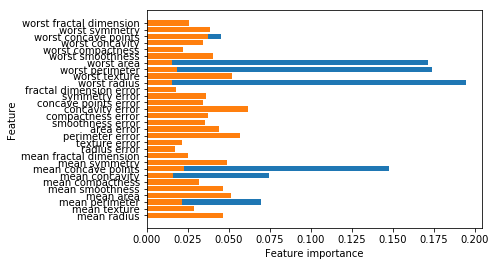

In [14]:
import matplotlib.pyplot as plt
def plot_feature_importances_dataset(model):
    n_features = dataset.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),dataset.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

#動作テスト
plot_feature_importances_dataset(rf)
plot_feature_importances_dataset(mf)

In [ ]:
feature_importances_なかった。
重要特徴量が分かるのを探す。

In [ ]:
mf.weight_decision_path

def comparison_algorithms(names, classifiers, X, y):
    X = pd.get_dummies(X)
    X = StandardScaler().fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    train_times = []
    predict_times = []
    scores = []
    cv_times = []
    cv_scores = []
    for name, clf in zip(names, classifiers):
        train_time,_ = calc_function(clf.fit, (X_train, y_train))
        train_times.append(train_time)

        predict_time,score = calc_function(clf.score, (X_test, y_test))
        predict_times.append(predict_time)
        scores.append(score)

        cv_time, cv_score = calc_function(cross_val_score, (clf, X, y, None, None, 5))
        cv_times.append(cv_time)
        cv_scores.append(np.mean(cv_score))

    df = pd.DataFrame()
    df["name"] = names
    df["train_time"] = train_times
    df["predict_time"] = predict_times
    df["score"] = scores
    df["cv_time"] = cv_times
    df["cv_score"] = cv_scores
    return df

In [2]:
import time

def calc_function(f, args):
    start = time.time()
    result = f(*args)
    end = time.time()
    return end-start

print(calc_function(rf.fit, (X_train_scl,y_train.as_matrix().ravel()) ) )
#rf.fit(X_train_scl,y_train.as_matrix().ravel())
print(calc_function(gb.fit, (X_train_scl,y_train.as_matrix().ravel()) ))
print(calc_function(mf.fit,(X_train_scl,y_train.as_matrix().ravel())))

NameError: name 'rf' is not defined